In [1]:
# 1 task
import seaborn as sns
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Линейная регрессия

## 1
Используйте датасет sklearn.datasets.load_diabetes(). Разобраться с тем, какие данные в нём содержатся, а также какая переменная является целевой, можно по ссылке;

In [2]:
data = load_diabetes()

In [3]:
target = pd.DataFrame(data = data.target, columns= ['target'])
y = data.target

In [4]:
target

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [5]:
df = pd.DataFrame(data = data.data,columns = data.feature_names) 
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


В датасете содержатся данные о 442 пациентах. Данные представляют собой 10 показателей, такие как возраст,  пол, индекс массы тела,  среднее давление, а также 6 показателей крови.

Также можно заметить (и прочитать в документации), что данные были отстандартизированы (центрированы и поделены на стандартное отклонение,умноженое на корень из количества человек в выборке)

В качестве таргета- количественная мера прогрессирования заболевания через год после исходного уровня

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


Пропущенных значений нет

In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


## 2
Используйте любой известный алгоритм понижения размерности(например LDA) для того, чтобы снижить количество признаков до одного 

Будет использоваться алгоритм PCA

In [8]:
df_std=StandardScaler().fit_transform(df)

In [9]:
pca=PCA(n_components=1)
pca_res=pca.fit_transform(df_std)

In [10]:
#pca_res

In [11]:
pca.explained_variance_ratio_

array([0.40242108])

всего лишь 40% объясненных дисперсий...

In [12]:
lda = LinearDiscriminantAnalysis(n_components = 1)
lda_res=lda.fit_transform(df_std,y)
lda.explained_variance_ratio_

array([0.25204365])

Метод главных компонент лучше сохранил данные, будем использовать его 

### если надо реализовать самостоятельно, то вот метод главных компонент:

In [13]:
# находим ковариационные матрицы на стандартизированных данных
cov_mat = np.cov(df_std.T)
# находим собственные значения и вектора этих матриц
eig_vals, eig_vect = np.linalg.eig(cov_mat)
#создадим пару - собственное значение + собственный вектор и отсортируем по убывванию собственного значения
eig_pair = [(np.abs(eig_vals[i]), eig_vect[:,i]) for i in range(10)]
eig_pair.sort(key=lambda x: x[0],reverse=True)

sum_eigs=np.sum(eig_vals)
sum_eigs

10.022675736961453

In [14]:
#Для каждого собственного значения посчитаем отношение собственных значений к сумме всех собственных значений - получаем долю
var_eig = [(i/sum_eigs)*100 for i in sorted(eig_vals, reverse=True)]
print(sum(var_eig))
print(var_eig)

100.0
[40.24210750152786, 14.923196775986943, 12.05966259125001, 9.55476403264115, 6.62181391266174, 6.027170756201253, 5.365656523193776, 4.336820363655839, 0.7832002446108913, 0.08560729827053164]


Получили долю сохраняемых данных в каждой компоненте, они сходятся с тем что выдал sklearn

In [15]:
PCA_coef = eig_pair[0][1].reshape(10,1)
X=df_std.dot(PCA_coef)

In [16]:
#X

Получили такой же результат, как и с помощью sklearn

## 3
Реализуйте алгоритм линейной регрессии с использованием градиентного спуска и функциями потерь SMSE (см. выше) и SMAE (продифференцируйте самостоятельно). Обратите внимание, что для данного пункта запрещается использовать готовые реализации методов (LinearRegression, mean_squared_error и т.д.);

### точное аналит решение на одномерных данных

Задача линейной регрессии:
Точное аналитическое решение
\begin{equation}
    \begin{cases}
       (y - \hat{y_i})^2 \rightarrow min\\
       \hat{y_i} = kx_i +b 
    \end{cases}
\end{equation}
Решая такую систему получаем, что $$b= \bar{y} -k\bar{x}$$
$$ k = \frac{\bar{xy}-\bar{x}\bar{y}}{\bar{x^2}-(\bar{x})^2}
$$

In [17]:
pca_res = pca_res.reshape(442)
mean_x = np.mean(pca_res)
mean_y = np.mean(y)
cov_xy = np.cov(pca_res,y)[1][0]
std_x = np.std(pca_res)
k = cov_xy/std_x**2
b = mean_y - k*mean_x
y_pred = b + k*pca_res
print(b,k)

152.13348416289594 21.366793139888546


In [18]:
residuals = y_pred - y
RSS = np.sum(residuals**2)
TSS = np.sum((y - mean_y)**2)
print("MSE  =",np.sum(residuals**2)/len(pca_res))
print("MAE =", np.sum(np.abs(residuals))/len(pca_res))
print("R^2 = ", 1-RSS/TSS )


MSE  = 4100.985507401513
MAE = 53.168754423300456
R^2 =  0.30842072338735804


In [19]:
print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))
print(mean_absolute_error(y, y_pred))

0.30842072338735804
4100.985507401513
53.168754423300456


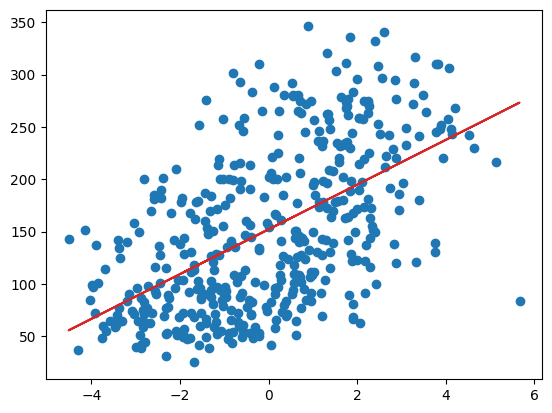

In [20]:
fig,ax = plt.subplots(1, 1)
ax.scatter(pca_res, y)
ax.plot(pca_res,y_pred, 'tab:red' )
plt.show()

А если с lda... 

In [21]:
lda_res = lda_res.reshape(442)
mean_x = np.mean(lda_res)
mean_y = np.mean(y)
cov_xy = np.cov(lda_res,y)[1][0]
std_x = np.std(lda_res)
k = cov_xy/std_x**2
b = mean_y - k*mean_x
y_pred = b + k*lda_res

In [22]:
residuals = y_pred - y
RSS = np.sum(residuals**2)
TSS = np.sum((y - mean_y)**2)
print("MSE  =",np.sum(residuals**2)/len(pca_res))
print("MAE =", np.sum(np.abs(residuals))/len(pca_res))
print("R^2 = ", 1-RSS/TSS )

MSE  = 2962.9190821295992
MAE = 43.75645543029164
R^2 =  0.5003412151096974


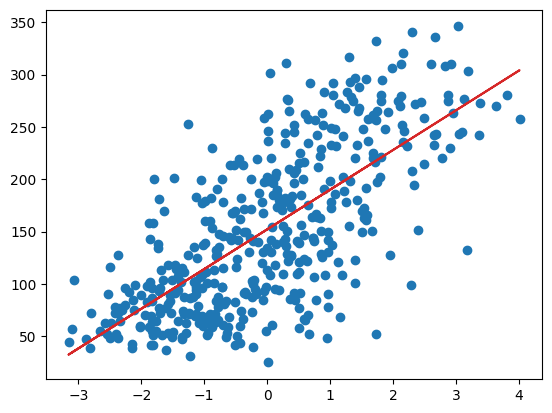

In [23]:
fig,ax = plt.subplots(1, 1)
ax.scatter(lda_res, y)
ax.plot(lda_res,y_pred, 'tab:red' )
plt.show()

данные после метода lda лучше коррелируют с таргетом, поэтому оценки лучше 

In [24]:
# точное аналитическое решение на многомерных данных

### Приближенная линейная регрессия по MSE

In [25]:
def linreg_mse(X, y,iter, eps):
    point = np.array([0.0,0.0]) # начальные веса нулевая отвечает за свободный коэф, первая за коэф при 
    w = np.copy(point)
    n = len(X)
    for i in range(iter):
        w[0] =point[0]-(-2/n * np.sum(y - (point[1]*X + point[0])))*eps
        w[1] =point[1]-( -2 / n * np.sum(np.dot(X,(y - (point[1]*X + point[0])))))*eps
        y_pred = w[1]*X + w[0]
        loss = np.sum((y_pred-y)**2)
        #print('loss =',  loss, 'iter =', i+1)
        point = np.copy(w)
    return y_pred, w

In [26]:
res_mse, coef = linreg_mse(pca_res, y, 100, 0.1)

In [27]:
coef #152.13348416289594 21.366793139888546

array([152.13348413,  21.31845198])

In [28]:
res_mse, coef = linreg_mse(pca_res, y, 30, 0.1)

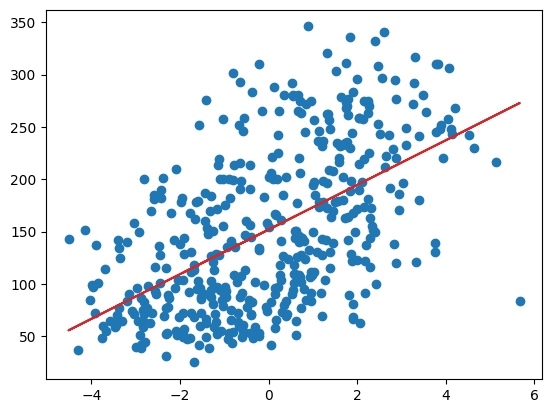

In [29]:
fig,ax = plt.subplots(1, 1)
ax.scatter(pca_res, y)
ax.plot(pca_res, res_mse, 'tab:red' )
plt.show()

### Приближенная линейная регрессия по MAE

Метод градиентного спуска при MAE:
$$S_{MAE}  = \frac{1}{n} \sum_{i=1}^n |y_i - (b + kx_i)|$$

Тогда 

$$
\frac{\partial S_{MAE}}{\partial b} = 
\frac{1}{n}\sum_{i=1}^n \frac{(y_i - (b + kx_i))}{|y_i - (b + kx_i)|}
$$

$$
\frac{\partial S_{MAE}}{\partial k} = 
\frac{1}{n}\sum_{i=1}^n x_i\frac{(y_i - (b + kx_i))}{|y_i - (b + kx_i)|}
$$

Если  $y_i - (b + kx_i) = 0$, то функция не дифференцируема.

In [30]:
def linreg_mae(X, y,iter, eps):
    point = np.array([0.0,0.0]) # начальные веса нулевая отвечает за свободный коэф, первая за коэф при 
    w = np.copy(point)
    loss_prev = np.sum(np.abs(w[1]*X + w[0]-y))
    loss_diff = np.zeros(2)
    n = len(X)
    for i in range(iter):
        w[0] =point[0]+np.mean((y - point[0] - point[1]*X)/np.abs(y - point[0] - point[1]*X))*eps
        w[1] =point[1]+np.mean(X*(y - point[0] - point[1]*X)/np.abs(y - point[0] - point[1]*X))*eps      
        y_pred = w[1]*X + w[0]
        loss_next= np.sum(np.abs(y_pred-y))
        #print('loss =',  loss_next, 'iter =', i+1)
        point = np.copy(w)
        
        if loss_prev<loss_next:
            break
        loss_prev = loss_next
    return y_pred, w

In [31]:
res_mae, coef_mae = linreg_mae(pca_res, y, 30000, 1) 

In [32]:
print(coef_mae)#152.13348416289594 21.366793139888546

[145.80995475  23.58680083]


In [33]:
res_lda_mae,_ =  linreg_mae(lda_res, y, 30000, 1) 

In [34]:
print(_) 

[149.58823529  38.31842292]


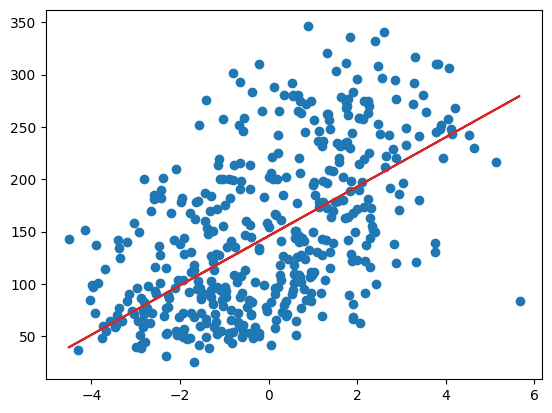

In [35]:
fig,ax = plt.subplots(1, 1)
ax.scatter(pca_res, y)
ax.plot(pca_res, res_mae, 'tab:red' )
plt.show()

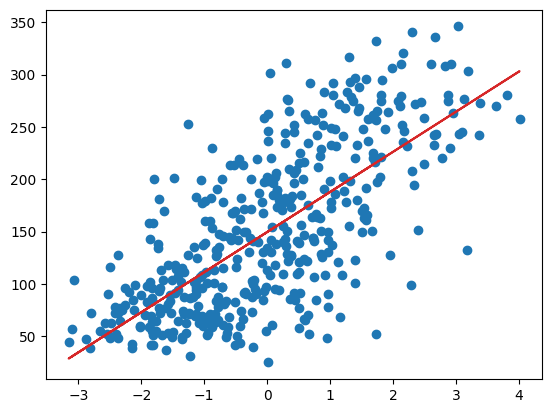

In [36]:
fig,ax = plt.subplots(1, 1)
ax.scatter(lda_res, y)
ax.plot(lda_res, res_lda_mae, 'tab:red' )
plt.show()

## 4

Теперь постройте прогнозы, используя стандартную реализацию LinearRegression из sklearn 

### модель из sklearn

In [37]:
reg=LinearRegression()
reg.fit(pca_res.reshape(-1, 1),y)
y_pred1 = reg.predict(pca_res.reshape(-1, 1))
#y_pred1

In [38]:
print('R^2',r2_score(y, y_pred1))
print('MSE', mean_squared_error(y, y_pred1))
print('MAE',mean_absolute_error(y, y_pred1))
print('RMSE',root_mean_squared_error(y, y_pred1))
print('MSLE',mean_squared_log_error(y, y_pred1))

R^2 0.30842230926108993
MSE 4100.976103352822
MAE 53.177793394348235
RMSE 64.03886400735746
MSLE 0.22744259406820805


In [39]:
#если построить на всех данных
reg1=LinearRegression()
reg1.fit(df_std,y)

LinearRegression()

In [40]:
reg1.score(df_std,y)

0.5177484222203499

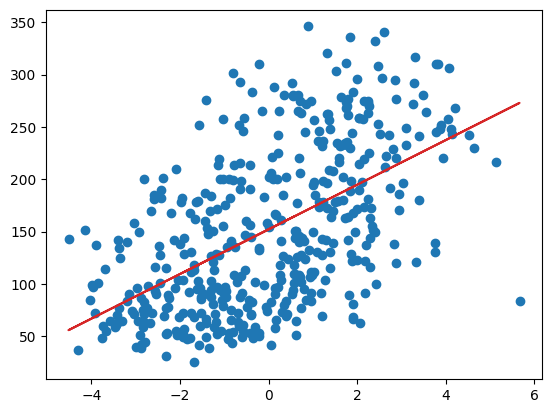

In [41]:
fig,ax = plt.subplots(1, 1)
ax.scatter(pca_res, y)
ax.plot(pca_res,y_pred1, 'tab:red' )
plt.show()

## 5 

Сравните основные метрики качества для "собственной" реализации и варианта из sklearn – MSE, MSLE, MAE, R2, RMSE. Какой из двух алгоритмов оказался эффективнее? Какой менее подвержен переобучению?

### Метрики качества для реализации модели из sklearn

In [42]:
print('R^2',r2_score(y, y_pred1))
print('MSE', mean_squared_error(y, y_pred1))
print('MAE',mean_absolute_error(y, y_pred1))
print('RMSE',root_mean_squared_error(y, y_pred1))
print('MSLE',mean_squared_log_error(y, y_pred1))

R^2 0.30842230926108993
MSE 4100.976103352822
MAE 53.177793394348235
RMSE 64.03886400735746
MSLE 0.22744259406820805


### Метрики качества для  реализации через MSE loss

In [43]:
print('R^2',r2_score(y, res_mse))
print('MSE', mean_squared_error(y, res_mse))
print('MAE',mean_absolute_error(y, res_mse))
print('RMSE',root_mean_squared_error(y, res_mse))
print('MSLE',mean_squared_log_error(y, res_mse))

R^2 0.3084163278647696
MSE 4101.011572344525
MAE 53.16245609978457
RMSE 64.03914094008854
MSLE 0.22719733309754606


### Метрики качества для реализации через MAE loss

In [44]:
print('R^2',r2_score(y, res_mae))
print('MSE', mean_squared_error(y, res_mae))
print('MAE',mean_absolute_error(y, res_mae))
print('RMSE',root_mean_squared_error(y, res_mae))
print('MSLE',mean_squared_log_error(y, res_mae))

R^2 0.2981871654856495
MSE 4161.669327844513
MAE 52.69856817993543
RMSE 64.5110016031724
MSLE 0.225650158712726


Лучше обучился алгоритм на MSE, он совпадает с точным аналитическим решением и решением с помошью sklearn.

Также MSE менее склонен к переобучению.

### Для данных после lda 

(r2 и другие метрики должны быть лучше, интересно, как там поведет себя mae)

In [45]:
res2_mse ,_ = linreg_mse(lda_res, y, 30, 0.1)
res2_mae ,_ = linreg_mae(lda_res, y, 300, 1)
reg2=LinearRegression()
reg2.fit(lda_res.reshape(-1,1),y)
res2_skl = reg2.predict(lda_res.reshape(-1,1))

In [46]:
print('MSE model')
print('R^2',r2_score(y, res2_mse))
print('MSE', mean_squared_error(y, res2_mse))
print('MAE',mean_absolute_error(y, res2_mse))
print('RMSE',root_mean_squared_error(y, res2_mse))
print('MSLE',mean_squared_log_error(y, res2_mse))
print()
print('MAE model')
print('R^2',r2_score(y, res2_mae))
print('MSE', mean_squared_error(y, res2_mae))
print('MAE',mean_absolute_error(y, res2_mae))
print('RMSE',root_mean_squared_error(y, res2_mae))
print('MSLE',mean_squared_log_error(y, res2_mae))
print()
print('slearn model')
print('R^2',r2_score(y, res2_skl))
print('MSE', mean_squared_error(y, res2_skl))
print('MAE',mean_absolute_error(y, res2_skl))
print('RMSE',root_mean_squared_error(y, res2_skl))
print('MSLE',mean_squared_log_error(y, res2_skl))

MSE model
R^2 0.5003378064263244
MSE 2962.9392952296507
MAE 43.75247955001098
RMSE 54.432887992735154
MSLE 0.17443378196147394

MAE model
R^2 0.49120267211634416
MSE 3017.109590205651
MAE 43.869504983105486
RMSE 54.92822216498228
MSLE 0.17119052792419118

slearn model
R^2 0.5003437878226505
MSE 2962.9038262379145
MAE 43.75503613338253
RMSE 54.43256218696594
MSLE 0.17456677174655807


Данные получены после понижения размерности с помощью метода lda лучше коррелируют с таргетом, поэтому метрики качества несколько лучше, чем для данных после pca(хотя он и сохраняет больше информации из изначальных данных).  

Если смотреть метрики после трейна на всех данных - можно сделать вывод о том, что наилучшая модель получается через встраенную функцию sklearn'а,
loss mse и mae там наименьший. Далее по точности идет cозданныя модель  с поиском оптимальных весов через MSE, и хуже всех с задачей спраился mae-алгоритм.


### Посмотрим что будет, если разделить данные на тренировочную и тестовую выборки и предсказать значения...

In [47]:
X_train, X_test, y_train, y_test = train_test_split(lda_res, y, test_size=0.33, random_state=42)

In [48]:
res4_mse , res4_coef_mse = linreg_mse(X_train, y_train, 30, 0.1)
res4_mae , res4_coef_mae = linreg_mae(X_train, y_train, 300, 1)
y_pred4_mse = res4_coef_mse[0] + res4_coef_mse[1]*X_test
y_pred4_mae = res4_coef_mae[0] + res4_coef_mae[1]*X_test
reg4=LinearRegression()
reg4.fit(X_train.reshape(-1, 1), y_train)
res4_skl = reg4.predict(X_test.reshape(-1, 1))

In [49]:
print('MSE model')
print('R^2',r2_score(y_test, y_pred4_mse))
print('MSE', mean_squared_error(y_test, y_pred4_mse))
print('MAE',mean_absolute_error(y_test, y_pred4_mse))
print('RMSE',root_mean_squared_error(y_test, y_pred4_mse))
print('MSLE',mean_squared_log_error(y_test, y_pred4_mse))
print()
print('MAE model')
print('R^2',r2_score(y_test, y_pred4_mae))
print('MSE', mean_squared_error(y_test, y_pred4_mae))
print('MAE',mean_absolute_error(y_test, y_pred4_mae))
print('RMSE',root_mean_squared_error(y_test, y_pred4_mae))
print('MSLE',mean_squared_log_error(y_test, y_pred4_mae))
print()
print('slearn model')
print('R^2',r2_score(y_test, res4_skl))
print('MSE', mean_squared_error(y_test, res4_skl))
print('MAE',mean_absolute_error(y_test, res4_skl))
print('RMSE',root_mean_squared_error(y_test, res4_skl))
print('MSLE',mean_squared_log_error(y_test, res4_skl))

MSE model
R^2 0.5254407459119357
MSE 2731.2118445946767
MAE 41.61178560985784
RMSE 52.260997355529646
MSLE 0.15876074980305438

MAE model
R^2 0.5021464989107444
MSE 2865.276290230293
MAE 42.32720189368331
RMSE 53.52827561420499
MSLE 0.1630817249392502

slearn model
R^2 0.5257650360142916
MSE 2729.3454707730534
MAE 41.60391912277853
RMSE 52.24313802570681
MSLE 0.15869874848786272


При проверке на тестовых данных метрики даже улучшились....
модели приемлемые( если не считать, что коэф детерминации не особо большой)
    

Loss Mse более чувствителен к выбросам и аномальным значениям данных, так что если не "чистить" данные перед тем, как начать его использовать, результат вычислений может сильно измениться из-за таких значений. В MAE такой проблемы не существует, но лосс по мае может и не обнаружить выбросы. В общем надо использовать разное в зависимости от задачи. 

## 6
Постройте на плоскости графики прямых (регрессий) для "собственнной" реализации и варианта из sklearn.

### Для моделей на lda

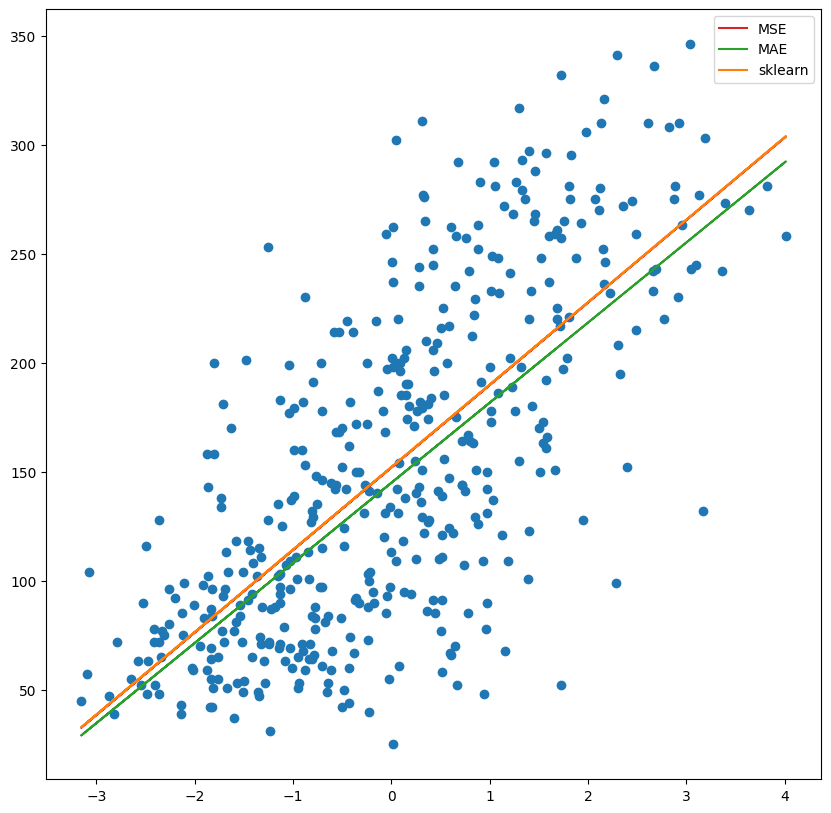

In [50]:
fig  = plt.figure(figsize=(10,10))
plt.scatter(lda_res, y)
plt.plot(lda_res, res2_mse, 'tab:red', label='MSE' )
plt.plot(lda_res, res2_mae, 'tab:green',label='MAE')
plt.plot(lda_res, res2_skl, 'tab:orange', label='sklearn' )
plt.legend()
plt.show()

На графике красную линию полностью перекрывает оранжевая(

# Кластеризация: о вкусах не спорят

In [51]:
data = pd.read_excel("song.xlsx")

In [52]:
data

,singer,text
0,Katy Perry,Don't be afraid to catch feels\nRide drop top ...
1,Katy Perry,Don't be afraid to catch feels (Ha)\nRide drop...
2,Katy Perry,Don't be afraid to catch feels\nDon't be afrai...
3,Katy Perry,"And do you mind if I steal a kiss? (Chop, chop..."
4,Katy Perry,A tiger\nDon't lose no sleep\nDon't need opini...
...,...,...
148,grandson,"I couldn't find the fill again, I\nCouldn't se..."
149,grandson,"We'll never get free, lamb to the slaughter\nW..."
150,grandson,Look me in my eyes\nTell me everything's not f...
151,grandson,Beg me for mercy\nAdmit you were toxic\nYou po...


In [53]:
df = data.drop_duplicates()
df

,singer,text
0,Katy Perry,Don't be afraid to catch feels\nRide drop top ...
1,Katy Perry,Don't be afraid to catch feels (Ha)\nRide drop...
2,Katy Perry,Don't be afraid to catch feels\nDon't be afrai...
3,Katy Perry,"And do you mind if I steal a kiss? (Chop, chop..."
4,Katy Perry,A tiger\nDon't lose no sleep\nDon't need opini...
...,...,...
148,grandson,"I couldn't find the fill again, I\nCouldn't se..."
149,grandson,"We'll never get free, lamb to the slaughter\nW..."
150,grandson,Look me in my eyes\nTell me everything's not f...
151,grandson,Beg me for mercy\nAdmit you were toxic\nYou po...


In [54]:
singers = df.singer.unique()
singers

array(['Katy Perry', 'Joji', 'Lana Del Rey', 'Call Me Karizma',
       'grandson'], dtype=object)

In [55]:
text = df.text.unique()
sing = df.singer
#text

### подготовка датасета

In [56]:
import re
for i in range(len(text)):
     text[i] = re.sub("\n", " ", text[i])
     text[i] = re.sub("[^A-Za-z| ]","", text[i])
     text[i] = text[i].lower()
text

array(['dont be afraid to catch feels ride drop top and chase thrills hey i know you aint afraid to pop pills hey baby i know you aint scared to catch feels feels with me',
       'dont be afraid to catch feels ha ride drop top and chase thrills ohohoh oh i know you aint afraid to pop pills hey baby i know you aint scared to catch feels straight up feels with me woah',
       'dont be afraid to catch feels dont be afraid to catch these feels ride drop top and chase thrills yeah i know you aint afraid to pop pills i know baby i know you aint scared to catch feels woah woah woah feels with me dont be afraid to catch feels no no dont be afraid baby ride drop top and chase thrills woah okay i know you aint afraid to pop pills i know i know i know i know baby i know you aint scared to catch feels feels with me',
       'and do you mind if i steal a kiss chop chop a little souvenir can i steal it from you oh yeah to memorize the way you shock me zap the way you move it here hey just wanna fe

конечно есть проблема с тем, что слова через дефис записались как одно целое, но допустим

теперь перемешаем все

In [57]:
from sklearn.utils import shuffle
songs, targ = shuffle(text, sing, random_state=42)
target = np.zeros(len(targ))
targ = np.array(targ)

In [58]:
targ[0]

'Lana Del Rey'

In [59]:
for i in range(len(targ)):
    target[i] = int(np.where(singers==targ[i])[0][0])
target = np.int_(target)
target

array([2, 0, 3, 2, 2, 1, 2, 4, 2, 2, 3, 0, 1, 0, 0, 1, 3, 2, 1, 4, 0, 4,
       0, 4, 4, 4, 3, 4, 1, 0, 0, 0, 2, 0, 1, 4, 1, 0, 0, 1, 4, 2, 2, 0,
       0, 2, 4, 4, 2, 3, 3, 3, 2, 0, 4, 2, 0, 1, 1, 1, 4, 0, 0, 0, 3, 1,
       3, 3, 1, 3, 3, 1, 4, 3, 2, 2, 4, 1, 0, 3, 3, 1, 1, 2, 2, 1, 3, 0,
       1, 2, 3, 3, 2, 4, 4, 2, 0, 0, 3, 4, 0, 0, 1, 2, 4, 0, 3, 3, 0, 2,
       1, 4, 1, 3, 1, 4, 2, 4, 2, 1, 2, 1, 1, 2, 1, 2, 3, 4, 0, 1, 4, 4,
       1, 4, 0, 1, 4, 3, 3, 3, 2, 2, 3, 4, 0, 2, 3, 0, 3, 3])

### Закодируем тексты

In [60]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import Normalizer

print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_features=10000,
                              stop_words='english')

X = vectorizer.fit_transform(songs)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
n_samples: 150, n_features: 1204


In [61]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, init='k-means++', max_iter=100000, n_init=10)

km.fit(X)


order_centroids = km.cluster_centers_.argsort()[:, ::-1]

In [62]:
km

KMeans(max_iter=100000, n_clusters=5, n_init=10)

In [63]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(target, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(target, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(target, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.064
Completeness: 0.071
V-measure: 0.067
Adjusted Rand-Index: 0.011
Silhouette Coefficient: 0.010


In [64]:
 km.labels_

array([1, 4, 4, 2, 1, 3, 3, 3, 2, 3, 2, 4, 2, 1, 3, 3, 1, 2, 2, 3, 2, 1,
       0, 1, 3, 1, 3, 3, 3, 2, 3, 4, 0, 2, 4, 3, 2, 1, 1, 1, 4, 2, 2, 3,
       1, 3, 1, 1, 4, 3, 4, 4, 0, 2, 3, 2, 1, 1, 1, 3, 1, 1, 4, 0, 1, 3,
       1, 4, 2, 1, 3, 1, 4, 3, 3, 4, 3, 1, 4, 3, 2, 1, 1, 2, 3, 3, 1, 2,
       4, 1, 2, 2, 2, 4, 1, 1, 2, 4, 3, 4, 3, 2, 3, 0, 1, 3, 1, 2, 2, 0,
       3, 3, 2, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 2, 2, 3,
       3, 3, 2, 1, 1, 1, 1, 2, 4, 4, 4, 3, 4, 3, 1, 4, 1, 3])

In [65]:
target

array([2, 0, 3, 2, 2, 1, 2, 4, 2, 2, 3, 0, 1, 0, 0, 1, 3, 2, 1, 4, 0, 4,
       0, 4, 4, 4, 3, 4, 1, 0, 0, 0, 2, 0, 1, 4, 1, 0, 0, 1, 4, 2, 2, 0,
       0, 2, 4, 4, 2, 3, 3, 3, 2, 0, 4, 2, 0, 1, 1, 1, 4, 0, 0, 0, 3, 1,
       3, 3, 1, 3, 3, 1, 4, 3, 2, 2, 4, 1, 0, 3, 3, 1, 1, 2, 2, 1, 3, 0,
       1, 2, 3, 3, 2, 4, 4, 2, 0, 0, 3, 4, 0, 0, 1, 2, 4, 0, 3, 3, 0, 2,
       1, 4, 1, 3, 1, 4, 2, 4, 2, 1, 2, 1, 1, 2, 1, 2, 3, 4, 0, 1, 4, 4,
       1, 4, 0, 1, 4, 3, 3, 3, 2, 2, 3, 4, 0, 2, 3, 0, 3, 3])

## на другом датасете то же самое в надежде на улучшение метрик


In [66]:
data = pd.read_excel("songs_ml.xlsx")
data

,singer,text
0,Lana Del Rey,We both know\nThat it's not fashionable to lov...
1,Lana Del Rey,"Baby, you understand me now\nIf sometimes you ..."
2,Lana Del Rey,Put your white tennis shoes on and follow me\n...
3,Lana Del Rey,There's only 24 hours in a day\nAnd half as ma...
4,Lana Del Rey,"Carry me home, got my blue nail polish on\nIt'..."
...,...,...
151,Eminem,"Obie Trice, real name, no gimmicks\nRa—, *reco..."
152,Eminem,"Ugh, you're a monster\n\n\nI can swallow a bot..."
153,Eminem,"You sound like a bitch, bitch\nShut the fuck u..."
154,Eminem,"Look, if you had one shot or one opportunity\n..."


In [67]:
singers = data.singer.unique()
singers

array(['Lana Del Rey', 'The Weekend', 'Call Me Karizma', 'Katy Perry',
       'Eminem'], dtype=object)

In [68]:
text = data.text.unique()
sing = data.singer
len(text)

156

In [69]:
for i in range(len(text)):
     text[i] = re.sub("\n", " ", text[i])
     text[i] = re.sub("[^A-Za-z| ]","", text[i])
     text[i] = text[i].lower()
text

array(['we both know that its not fashionable to love me but you dont go cause truly theres nobody for you but me we could cruise to the blues wilshire boulevard if we choose or whatever you wanna do we make the rules our honeymoon our honeymoon our honeymoon say you want me too say you want me too dark blue dark blue we both know the history of violence that surrounds you but im not scared theres nothing to lose now that ive found you and we could cruise to the news pico boulevard in your used little bullet car if we choose mr borntolose our honeymoon our honeymoon our honeymoon say you want me too say you want me too dark blue dark blue there are violets in your eyes there are guns that blaze around you there are roses in between my thighs fire that surrounds you its no wonder every man in town had neither fought nor found you everything you do is elusive too even your honey dew our honeymoon our honeymoon our honeymoon dododododododo dadada dododododododo dadada dododododododo dadad

In [70]:
songs, targ = shuffle(text, sing, random_state=42)
target = np.zeros(len(targ))
targ = np.array(targ)

In [71]:
for i in range(len(targ)):
    target[i] = int(np.where(singers==targ[i])[0][0])
target = np.int_(target)
target

array([3, 2, 2, 2, 3, 0, 3, 4, 3, 4, 0, 2, 0, 4, 0, 0, 3, 3, 4, 2, 3, 0,
       0, 0, 0, 3, 2, 1, 1, 3, 1, 4, 1, 4, 3, 4, 4, 2, 1, 0, 4, 2, 4, 1,
       2, 0, 4, 2, 0, 1, 2, 3, 0, 3, 3, 1, 0, 0, 2, 3, 2, 0, 4, 0, 3, 4,
       0, 3, 2, 1, 2, 0, 1, 3, 0, 0, 3, 1, 2, 4, 4, 4, 1, 3, 1, 2, 1, 4,
       4, 1, 4, 3, 1, 0, 3, 4, 1, 1, 2, 2, 1, 1, 0, 1, 2, 3, 2, 2, 4, 4,
       2, 0, 0, 1, 4, 0, 0, 1, 2, 4, 0, 4, 3, 0, 3, 2, 3, 1, 3, 1, 4, 1,
       1, 2, 0, 1, 4, 4, 1, 4, 0, 1, 4, 3, 3, 3, 2, 2, 3, 4, 0, 2, 3, 0,
       2, 3])

In [72]:
print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_features=10000,
                              stop_words='english')

X = vectorizer.fit_transform(songs)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
n_samples: 156, n_features: 5944


In [73]:
km1 = KMeans(n_clusters=5, init='k-means++', max_iter=100000, n_init=10)

km1.fit(X)

order_centroids = km1.cluster_centers_.argsort()[:, ::-1]

In [74]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target, km1.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(target, km1.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(target, km1.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(target, km1.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km1.labels_, sample_size=1000))

Homogeneity: 0.137
Completeness: 0.161
V-measure: 0.148
Adjusted Rand-Index: 0.068
Silhouette Coefficient: 0.004


print('real data',target)
print('precision',km1.labels_ )

Разделять треки по исполнителям оказалось не особо хорошей идеей)

Метрики низкие, попаданий мало

Тут надо либо лучше поработать над изначальными данными, так как в песнях, которые брались есть много повторяющихся строк, и поэтому затруднительно будет удалить незначимые "фичи" в виде слов(например "I","we"), которые не несут никакой информации

Также в основном песни об одном, набор слов похож достаточно сильно 

Будто бы песни можно хорошо разделять по смысловому значению и посылу, а также по звукам и прочим отличительным особенностям.

### С MiniBatch

In [75]:
from sklearn.cluster import MiniBatchKMeans

k_means = MiniBatchKMeans(n_clusters=5)
k_means.fit(X) 
values = k_means.cluster_centers_
labels = k_means.labels_
labels

array([3, 3, 3, 1, 2, 3, 3, 1, 3, 1, 2, 3, 1, 0, 2, 2, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 1, 1, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 1, 0, 3, 1,
       3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 2, 2, 3, 1, 1, 0, 2, 0, 3, 1, 3, 1,
       1, 2, 1, 3, 1, 3, 3, 2, 1, 4, 3, 3, 2, 3, 3, 1, 1, 3, 3, 3, 1, 3,
       3, 2, 1, 3, 1, 3, 1, 1, 1, 3, 2, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 2,
       3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 1, 2, 3, 3, 1,
       3, 3])

In [76]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target, labels))
print("Completeness: %0.3f" % metrics.completeness_score(target, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(target, labels))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(target, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, sample_size=1000))

Homogeneity: 0.121
Completeness: 0.162
V-measure: 0.138
Adjusted Rand-Index: 0.089
Silhouette Coefficient: 0.003


Но если перезапускать и смотреть вывод - он каждый раз разный, говрит о том что модель действительно не очень хорошо кластеризирует 